<a href="https://colab.research.google.com/github/darwinpadilla/darwinpadilla/blob/main/Vertebrate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
#Instalaciones para graficar los árboles
!sudo apt install -y graphviz
!pip install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


**Algunos hotkeys útiles en Colaboratory:** RD

* **control+enter**: correr celda.
* **enter**: editar celda (modo edición).
* **escape**: salir del modo edición.
* **control+s**: guardar notebook.

**Fuera del modo edición se pueden utilizar los siguientes hotkeys:**
* **control+m+a**: agregar celda arriba.
* **control+m+b**: agregar celda abajo.
* **control+m+d**: borrar celda.
* **control+shift+z**: deshacer borrar celda.
* **control+m+y**: establecer celda en modo python (código).
* **control+m+m**: establecer celda en modo markdown (texto).
* **control+m+o**: mostrar/ocultar resultado.

**Cheat sheets de librerías:**

* **Jupyter notebook**: Entorno de trabajo [(Cheat sheet)](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Jupyter_Notebook_Cheat_Sheet.pdf)
* **Numpy**: librería de funciones matemáticas de alto nivel para operar con vectores y matrices [(Cheat sheet)](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)
* **Pandas**: librería destinada al análisis de datos, permiten trabajar con datos estructurados de forma muy eficiente [(Cheat sheet)](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)

Los cheatsheets son un resumen de las principales funciones de las librerías

Pueden revisar la documentación de cualquier módulo o función agregando un signo de pregunta y ejecutando la celda; por ejemplo:

```
#Agregar el signo de pregunta y entonces ejecutar la celda
pd.read_csv?
```



In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

pd.set_option("display.max_columns", 50)

%matplotlib inline

In [6]:
#GM
print('Hola esto es una prueba1')
print('Hola Rolando')

Hola esto es una prueba1
Hola Rolando


\* La linea **%matplotlib inline**, establece el backend de matplotlib para que la salida de los comandos que generen un "plot" se muestren debajo de la celda de código que los produjo.

# Dataset

Usaremos el vertebrate dataset, el cual se encuentra en:
<br/>
<br/>
Introduction to Data Mining (2006), Pang-Ning Tan, Michael Steinbach and Vipin Kumar
<br/>
<br/>
El dataset mencionado se generará al ejecutar la siguiente celda:

In [ ]:
#@title Vertebrate Dataset: vertebrate_train.csv
%%writefile vertebrate_train.csv
Name,Body Temperature,Skin Cover,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class Label
human,warm-blooded,hair,yes,no,no,yes,no,mammal
python,cold-blooded,scales,no,no,no,no,yes,reptile
salmon,cold-blooded,scales,no,yes,no,no,no,fish
whale,warm-blooded,hair,yes,yes,no,no,no,mammal
frog,cold-blooded,none,no,semi,no,yes,yes,amphibian
komodo dragon,cold-blooded,scales,no,no,no,yes,no,reptile
bat,warm-blooded,hair,yes,no,yes,yes,yes,mammal
pigeon,warm-blooded,feathers,no,no,yes,yes,no,bird
cat,warm-blooded,fur,yes,no,no,yes,no,mammal
leopard shark,cold-blooded,scales,yes,yes,no,no,no,fish
turtle,cold-blooded,scales,no,semi,no,yes,no,reptile
penguin,warm-blooded,feathers,no,semi,no,yes,no,bird
porcupine,warm-blooded,quills,yes,no,no,yes,yes,mammal
eel,cold-blooded,scales,no,yes,no,no,no,fish
salamander,cold-blooded,none,no,semi,no,yes,yes,amphibian

Writing vertebrate_train.csv


In [ ]:
%ls

sample_data/  vertebrate_train.csv


# Revisión del dataset

In [ ]:
#Lectura del dataset
file_name = "vertebrate_train.csv"

#El método "read_csv" nos permite leer un excel
dataset = pd.read_csv(file_name)

In [ ]:
#Tamaño del dataset (registros, variables). En la nomenclatura de pandas es (axis 0, axis 1)
dataset.shape

(15, 9)

In [ ]:
#Vemos los primeros registros del dataset
dataset.head()

,Name,Body Temperature,Skin Cover,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class Label
0,human,warm-blooded,hair,yes,no,no,yes,no,mammal
1,python,cold-blooded,scales,no,no,no,no,yes,reptile
2,salmon,cold-blooded,scales,no,yes,no,no,no,fish
3,whale,warm-blooded,hair,yes,yes,no,no,no,mammal
4,frog,cold-blooded,none,no,semi,no,yes,yes,amphibian


# Pre-procesamiento del dataset

In [ ]:
#Separamos la data, en variables independientes (x) y dependientes (y), para poder entrenar un árbol de clasificación
x = dataset.drop(["Name", "Class Label"], axis=1)

y = dataset["Class Label"]

In [ ]:
x.head()

,Body Temperature,Skin Cover,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates
0,warm-blooded,hair,yes,no,no,yes,no
1,cold-blooded,scales,no,no,no,no,yes
2,cold-blooded,scales,no,yes,no,no,no
3,warm-blooded,hair,yes,yes,no,no,no
4,cold-blooded,none,no,semi,no,yes,yes


In [ ]:
y.head()

0       mammal
1      reptile
2         fish
3       mammal
4    amphibian
Name: Class Label, dtype: object

In [ ]:
#Mostramos la matriz transpuesta para visualizar las variables como registros y los registros como variables
x.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Body Temperature,warm-blooded,cold-blooded,cold-blooded,warm-blooded,cold-blooded,cold-blooded,warm-blooded,warm-blooded,warm-blooded,cold-blooded,cold-blooded,warm-blooded,warm-blooded,cold-blooded,cold-blooded
Skin Cover,hair,scales,scales,hair,none,scales,hair,feathers,fur,scales,scales,feathers,quills,scales,none
Gives Birth,yes,no,no,yes,no,no,yes,no,yes,yes,no,no,yes,no,no
Aquatic Creature,no,no,yes,yes,semi,no,no,no,no,yes,semi,semi,no,yes,semi
Aerial Creature,no,no,no,no,no,no,yes,yes,no,no,no,no,no,no,no
Has Legs,yes,no,no,no,yes,yes,yes,yes,yes,no,yes,yes,yes,no,yes
Hibernates,no,yes,no,no,yes,no,yes,no,no,no,no,no,yes,no,yes


In [ ]:
#Transformamos los datos numéricos
x = pd.get_dummies(x)

In [ ]:
x.head()

,Body Temperature_cold-blooded,Body Temperature_warm-blooded,Skin Cover_feathers,Skin Cover_fur,Skin Cover_hair,Skin Cover_none,Skin Cover_quills,Skin Cover_scales,Gives Birth_no,Gives Birth_yes,Aquatic Creature_no,Aquatic Creature_semi,Aquatic Creature_yes,Aerial Creature_no,Aerial Creature_yes,Has Legs_no,Has Legs_yes,Hibernates_no,Hibernates_yes
0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,0
1,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,0,1
2,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0,1,0
3,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0
4,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1


In [ ]:
y.head()

0       mammal
1      reptile
2         fish
3       mammal
4    amphibian
Name: Class Label, dtype: object

In [ ]:
#Mostramos la matriz transpuesta para visualizar las variables como registros y los registros como variables
x.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Body Temperature_cold-blooded,0,1,1,0,1,1,0,0,0,1,1,0,0,1,1
Body Temperature_warm-blooded,1,0,0,1,0,0,1,1,1,0,0,1,1,0,0
Skin Cover_feathers,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
Skin Cover_fur,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Skin Cover_hair,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
Skin Cover_none,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
Skin Cover_quills,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Skin Cover_scales,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0
Gives Birth_no,0,1,1,0,1,1,0,1,0,0,1,1,0,1,1
Gives Birth_yes,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0


# Entrenamiento y verificación de un árbol de clasificación

La librería [scikit-learn](http://scikit-learn.org) ofrece un conjunto de utilidades y funciones para aplicar los algoritmos más conocidos de  machine learning. En su [documentación](http://scikit-learn.org/stable/documentation.html) se encuentran tutoriales y guías de usuario bien detalladas.

Vamos a crear un modelo de árbol de decisión usando la clase **DecisionTreeClassifier**.

Luego usando el método **fit** del modelo, vamos a entrenar el árbol.

In [ ]:
#Entrenamos el árbol de clasificación
model = DecisionTreeClassifier()

model.fit(x, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Podemos verificar las etiquetas que tuvo que predecir nuestro árbol de clasificación
print("Etiquetas a predecir: {}".format(set(y)))

print("Etiquetas predecidas: {}".format(model.classes_))

Etiquetas a predecir: {'mammal', 'reptile', 'bird', 'amphibian', 'fish'}
Etiquetas predecidas: ['amphibian' 'bird' 'fish' 'mammal' 'reptile']


In [ ]:
#Revisamos el "accuracy" (exactitud) obtenido
model.score(x, y)

1.0

# Visualización del árbol de clasificación

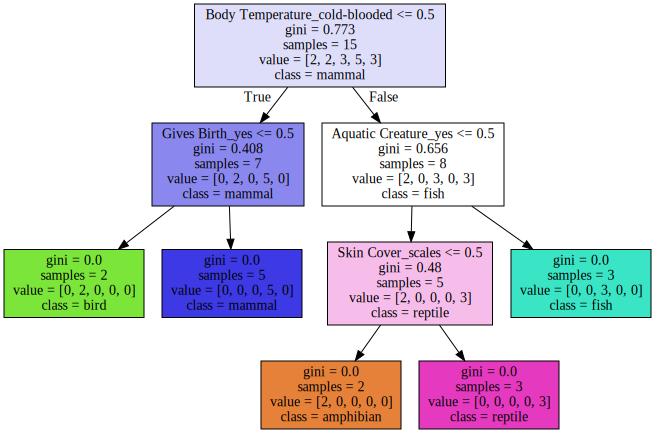

In [ ]:
#@title Visualización de todo el árbol
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG

classes = [(str(model_class) if isinstance(model_class, np.integer) else model_class) for model_class in model.classes_]

graph = Source(export_graphviz(model, feature_names=x.columns, class_names=classes, filled=True))

SVG(graph.pipe(format="svg"))

# Cálculo manual del gini inicial (del primer nodo/regla)

In [ ]:
y.value_counts()

mammal       5
fish         3
reptile      3
amphibian    2
bird         2
Name: Class Label, dtype: int64

In [ ]:
#El método "len" devuelve el tamaño de una estructura de datos; en este caso, el número de elementos en "y"
len(y)

15

$p_i$:

In [ ]:
y.value_counts() / len(y)

mammal       0.333333
fish         0.200000
reptile      0.200000
amphibian    0.133333
bird         0.133333
Name: Class Label, dtype: float64

$p_i^2$:

In [ ]:
p_i = y.value_counts() / len(y)

p_i ** 2

mammal       0.111111
fish         0.040000
reptile      0.040000
amphibian    0.017778
bird         0.017778
Name: Class Label, dtype: float64

$\sum\limits_i p_i^2$:

In [ ]:
p_i = y.value_counts() / len(y)

(p_i ** 2).sum()

0.22666666666666668

$I_G (p) = 1 - \sum\limits_i p_i^2$:

In [ ]:
p_i = y.value_counts() / len(y)

summation = (p_i ** 2).sum()

1 - summation

0.7733333333333333

# Ejercicio

La primera regla del árbol separa la data en 2 conjuntos (los que cumplen la regla y los que no). Calcular el gini para cada conjunto

In [ ]:
index_of_root = model.tree_.feature[0]

root_name = x.columns[index_of_root]

mask = x[root_name] <= 0.5

mask

0      True
1     False
2     False
3      True
4     False
5     False
6      True
7      True
8      True
9     False
10    False
11     True
12     True
13    False
14    False
Name: Body Temperature_cold-blooded, dtype: bool

In [ ]:
data_true = y[mask]

data_true

0     mammal
3     mammal
6     mammal
7       bird
8     mammal
11      bird
12    mammal
Name: Class Label, dtype: object

In [ ]:
data_false = y[~mask]

data_false

1       reptile
2          fish
4     amphibian
5       reptile
9          fish
10      reptile
13         fish
14    amphibian
Name: Class Label, dtype: object

In [ ]:
#Calcular el gini cuando la primera regla es verdadera (data_true)
len(y[mask])


7

In [ ]:
y[mask].value_counts() / len(y[mask])


mammal    0.714286
bird      0.285714
Name: Class Label, dtype: float64

In [ ]:
p_i = y[mask].value_counts() / len(y[mask])
p_i ** 2

mammal    0.510204
bird      0.081633
Name: Class Label, dtype: float64

In [ ]:
p_i = y[mask].value_counts() / len(y[mask])

summation = (p_i ** 2).sum()

1 - summation

0.40816326530612246

In [ ]:
#Calcular el gini cuando la primera regla no es verdadera (data_false)
len(y[~mask])
y[~mask].value_counts() / len(y[~mask])


fish         0.375
reptile      0.375
amphibian    0.250
Name: Class Label, dtype: float64

In [ ]:
p_i = y[~mask].value_counts() / len(y[~mask])
p_i ** 2

fish         0.140625
reptile      0.140625
amphibian    0.062500
Name: Class Label, dtype: float64

In [ ]:
p_i = y[~mask].value_counts() / len(y[~mask])

summation = (p_i ** 2).sum()

1 - summation

0.65625